In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import pandas as pd

data = pd.read_csv("apple_5yr_one.csv")
data

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
...,...,...,...,...,...,...
1251,2025-05-27,200.2100067138672,200.74000549316406,197.42999267578125,198.3000030517578,56288500
1252,2025-05-28,200.4199981689453,202.72999572753906,199.89999389648438,200.58999633789062,45339700
1253,2025-05-29,199.9499969482422,203.80999755859375,198.50999450683594,203.5800018310547,51396800
1254,2025-05-30,200.85000610351562,201.9600067138672,196.77999877929688,199.3699951171875,70819900


In [3]:
data = data[1:]
print(data.describe())
print(data.info())

              Date              Close              High                Low  \
count         1255               1255              1255               1255   
unique        1255               1240              1255               1255   
top     2020-06-04  142.5260467529297  79.1312690763083  77.95506657558614   
freq             1                  2                 1                  1   

                     Open    Volume  
count                1255      1255  
unique               1255      1253  
top     78.83236263047952  90956700  
freq                    1         2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 1 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1255 non-null   object
 2   High    1255 non-null   object
 3   Low     1255 non-null   object
 4   Open    1255 non-null   object
 5   Volume  1255 non-null   object
dtypes: object(6)
memory 

In [4]:
import numpy as np

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.day_name()
data['Volume'] = data['Volume'].astype(float)
data['Close'] = data['Close'].astype(float)
data['Open'] = data['Open'].astype(float)
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].astype(float)
print(data.head())


        Date      Close       High        Low       Open       Volume  Year  \
1 2020-06-04  78.329315  79.131269  77.955067  78.832363   87560400.0  2020   
2 2020-06-05  80.560219  80.620973  78.550469  78.579630  137250400.0  2020   
3 2020-06-08  81.036537  81.070563  79.544415  80.256454   95654400.0  2020   
4 2020-06-09  83.595505  83.989192  80.684163  80.715756  147712400.0  2020   
5 2020-06-10  85.746208  86.215230  84.105842  84.545702  166651600.0  2020   

   Month  Day    Weekday  
1      6    4   Thursday  
2      6    5     Friday  
3      6    8     Monday  
4      6    9    Tuesday  
5      6   10  Wednesday  


C:\Users\otman\AppData\Local\Temp\ipykernel_25128\786180219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\otman\AppData\Local\Temp\ipykernel_25128\786180219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
C:\Users\otman\AppData\Local\Temp\ipykernel_25128\786180219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [13]:

x = np.array(data['Volume'])
y = np.array(data['Close'])
z = np.array(data['Open'])
a = np.array(data['High'])
b = np.array(data['Low'])
c = np.array(data['Year'])
d = np.array(data['Month'])
e = np.array(data['Day'])

print("corelation between Volume and Close:", np.corrcoef(x, y)[0, 1])
print("corelation between Volume and Open:", np.corrcoef(x, z)[0, 1])
print("corelation between Volume and High:", np.corrcoef(x, a)[0, 1])
print("corelation between Volume and Low:", np.corrcoef(x, b)[0, 1])
print("corelation between Volume and Year:", np.corrcoef(x, c)[0, 1])
print("corelation between Volume and Month:", np.corrcoef(x, d)[0, 1])
print("corelation between Volume and Day:", np.corrcoef(x, e)[0, 1])

corelation between Volume and Close: -0.5606189655340653
corelation between Volume and Open: -0.5602917734789524
corelation between Volume and High: -0.5485428116579799
corelation between Volume and Low: -0.5724057600709751
corelation between Volume and Year: -0.5778461819706291
corelation between Volume and Month: 0.03907538938404487
corelation between Volume and Day: -0.00755445110311485


Trial 10 Complete [00h 00m 07s]
val_loss: 0.007677586283534765

Best val_loss So Far: 0.0069527458399534225
Total elapsed time: 00h 01m 00s
1/1 [==============================] - 0s 17ms/step
Next 10 days predicted Volume: [48329236. 48173216. 48059972. 47966152. 47887832. 47821376. 47763748.
 47714668. 47669324. 47629476.]


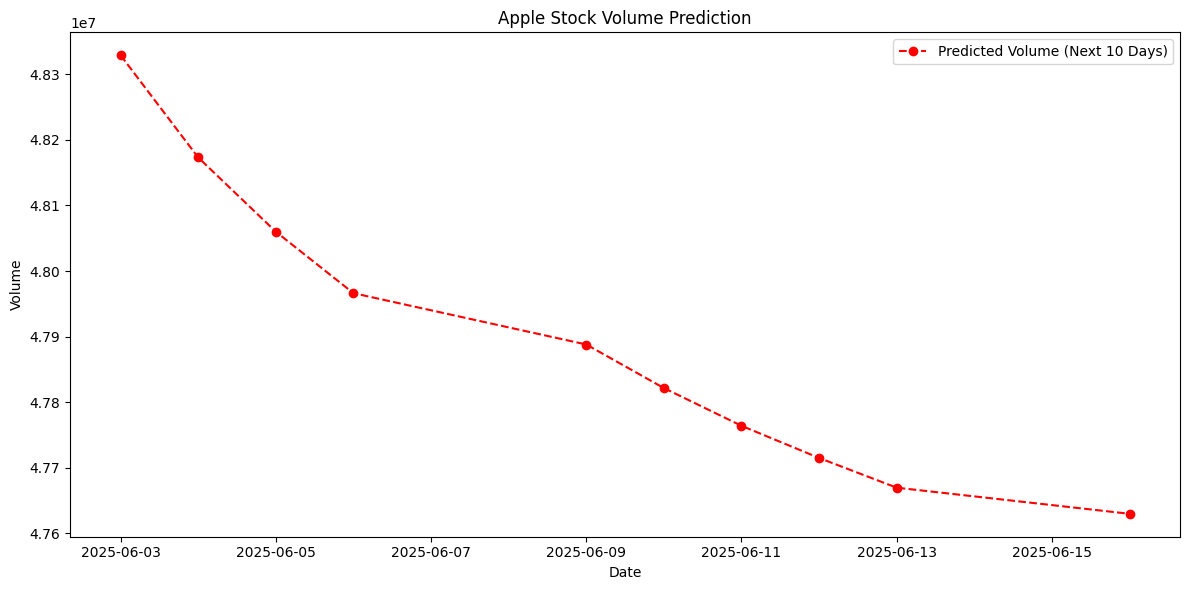

In [24]:
from tensorflow import keras
from keras_tuner.tuners import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Prepare data for RNN
scaler = MinMaxScaler()
volume_scaled = scaler.fit_transform(data['Volume'].values.reshape(-1, 1))

def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y_seq = create_sequences(volume_scaled, window_size)

# Split into train/test
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Model builder for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(window_size, 1)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.LSTM(units=hp.Int(f'units_{i}', 16, 200, step=16), return_sequences=(i < hp.get('num_layers')-1)))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')), loss='mse')
    return model

tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    directory='rnn2_tuner',
    project_name='volume_forecast'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)

best_model = tuner.get_best_models(1)[0]

# Predict next 10 days
last_sequence = volume_scaled[-window_size:]
predictions = []
current_seq = last_sequence.copy()
for _ in range(10):
    pred = best_model.predict(current_seq.reshape(1, window_size, 1))[0, 0]
    predictions.append(pred)
    current_seq = np.append(current_seq[1:], [[pred]], axis=0)

# Inverse transform to get actual volume values
predicted_volumes = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
print("Next 10 days predicted Volume:", predicted_volumes)

# Create a range for the next 10 days
future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10, freq='B')

plt.figure(figsize=(12, 6))
#plt.plot(data['Date'], data['Volume'], label='Historical Volume')
plt.plot(future_dates, predicted_volumes, marker='o', linestyle='--', color='red', label='Predicted Volume (Next 10 Days)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Volume Prediction')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 27ms/step
Next 10 days predicted Volume: [50187556. 50203176. 50192432. 50180236. 50176192. 50193876. 50199364.
 50204056. 50159604. 50097400.]


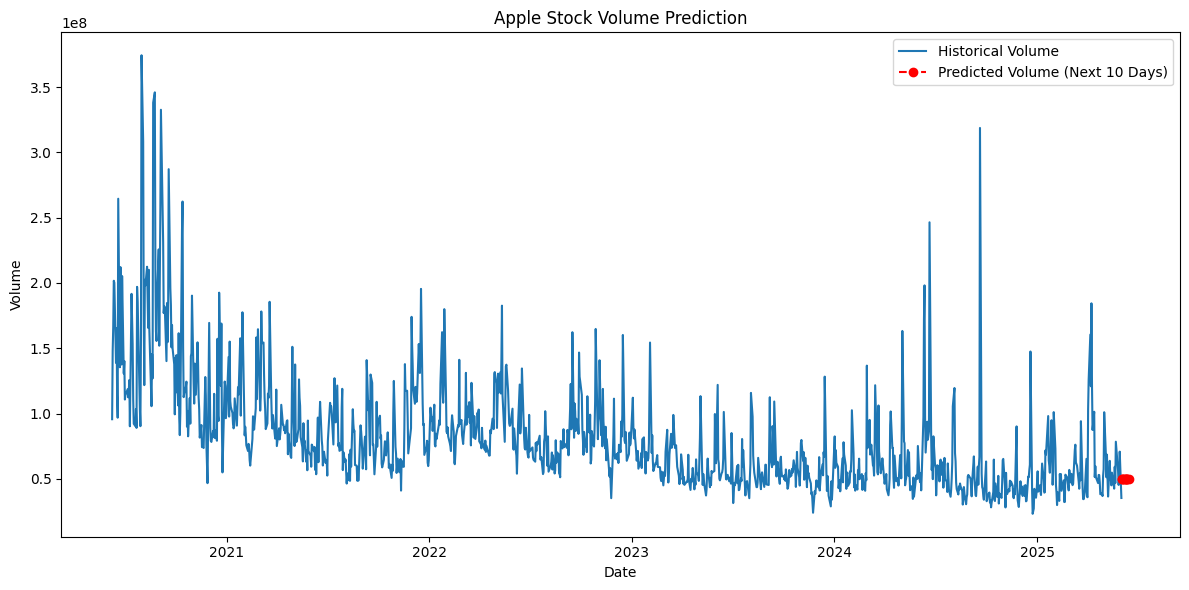

In [21]:
# Predict next 10 days
last_sequence = volume_scaled[-window_size:]
predictions = []
current_seq = last_sequence.copy()
for _ in range(10):
    pred = best_model.predict(current_seq.reshape(1, window_size, 1))[0, 0]
    predictions.append(pred)
    current_seq = np.append(current_seq[1:], [[pred]], axis=0)

# Inverse transform to get actual volume values
predicted_volumes = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
print("Next 10 days predicted Volume:", predicted_volumes)

# Create a range for the next 10 days
future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10, freq='B')

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Historical Volume')
plt.plot(future_dates, predicted_volumes, marker='o', linestyle='--', color='red', label='Predicted Volume (Next 10 Days)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Volume Prediction')
plt.legend()
plt.tight_layout()
plt.show()

Reloading Tuner from transformer_tuner\volume_forecast_transformer\tuner0.json
1/1 [==============================] - 0s 18ms/step
Next 10 days predicted Volume (Transformer): [43323288. 43275104. 43005140. 42703924. 42619040. 42551896. 42473932.
 42297368. 42005912. 41524712.]


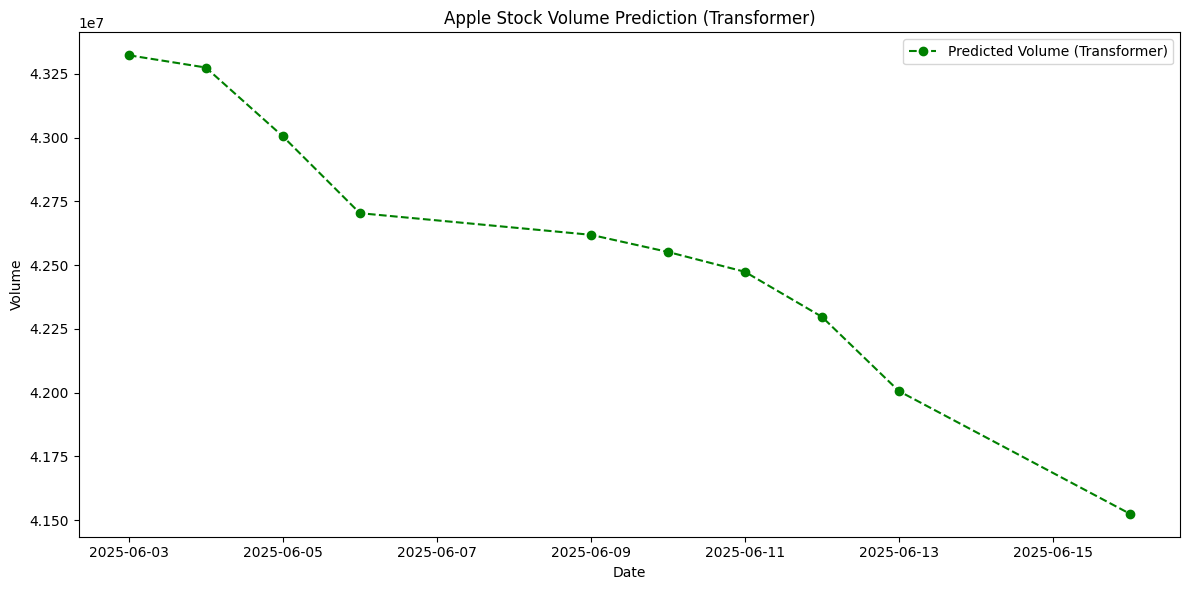

In [16]:
from tensorflow.keras import layers, models, optimizers
import keras_tuner as kt

data = pd.read_csv("apple_5yr_one.csv")
data = data[1:]
data['Date'] = pd.to_datetime(data['Date'])
data['Volume'] = data['Volume'].astype(float)
data['Close'] = data['Close'].astype(float)
data['Open'] = data['Open'].astype(float)
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].astype(float)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
volume_scaled = scaler.fit_transform(data['Volume'].values.reshape(-1, 1))
def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)
window_size = 30
X, y_seq = create_sequences(volume_scaled, window_size)
# Split into train/test
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y_seq[:split], y_seq[split:]
# Transformer model builder for Keras Tuner
from tensorflow.keras import layers, models, optimizers
import keras_tuner as kt


def transformer_model_builder(hp):
    input_layer = layers.Input(shape=(window_size, 1))
    # Positional Encoding
    x = layers.Dense(32)(input_layer)
    # Transformer Encoder block
    for i in range(hp.Int('num_transformer_blocks', 1, 2)):
        attn_output = layers.MultiHeadAttention(
            num_heads=hp.Int(f'num_heads_{i}', 2, 4),
            key_dim=hp.Int(f'key_dim_{i}', 8, 32, step=8)
        )(x, x)
        attn_output = layers.Dropout(hp.Float(f'attn_dropout_{i}', 0.0, 0.5, step=0.1))(attn_output)
        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)
        ffn = layers.Dense(hp.Int(f'ff_dim_{i}', 32, 128, step=32), activation='relu')(x)
        ffn = layers.Dense(32)(ffn)
        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn)
    x = layers.GlobalAveragePooling1D()(x)
    output = layers.Dense(1)(x)
    model = models.Model(inputs=input_layer, outputs=output)
    model.compile(
        optimizer=optimizers.Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='mse'
    )
    return model

transformer_tuner = kt.BayesianOptimization(
    transformer_model_builder,
    objective='val_loss',
    max_trials=5,
    directory='transformer_tuner',
    project_name='volume_forecast_transformer'
)

transformer_tuner.search(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)
best_transformer = transformer_tuner.get_best_models(1)[0]

# Predict next 10 days
last_sequence = volume_scaled[-window_size:]
predictions = []
current_seq = last_sequence.copy()
for _ in range(10):
    pred = best_transformer.predict(current_seq.reshape(1, window_size, 1))[0, 0]
    predictions.append(pred)
    current_seq = np.append(current_seq[1:], [[pred]], axis=0)

predicted_volumes = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
print("Next 10 days predicted Volume (Transformer):", predicted_volumes)

import matplotlib.pyplot as plt
# Create a range for the next 10 days
future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10, freq='B')

plt.figure(figsize=(12, 6))
plt.plot(future_dates, predicted_volumes, marker='o', linestyle='--', color='green', label='Predicted Volume (Transformer)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Volume Prediction (Transformer)')
plt.legend()
plt.tight_layout()
plt.show()

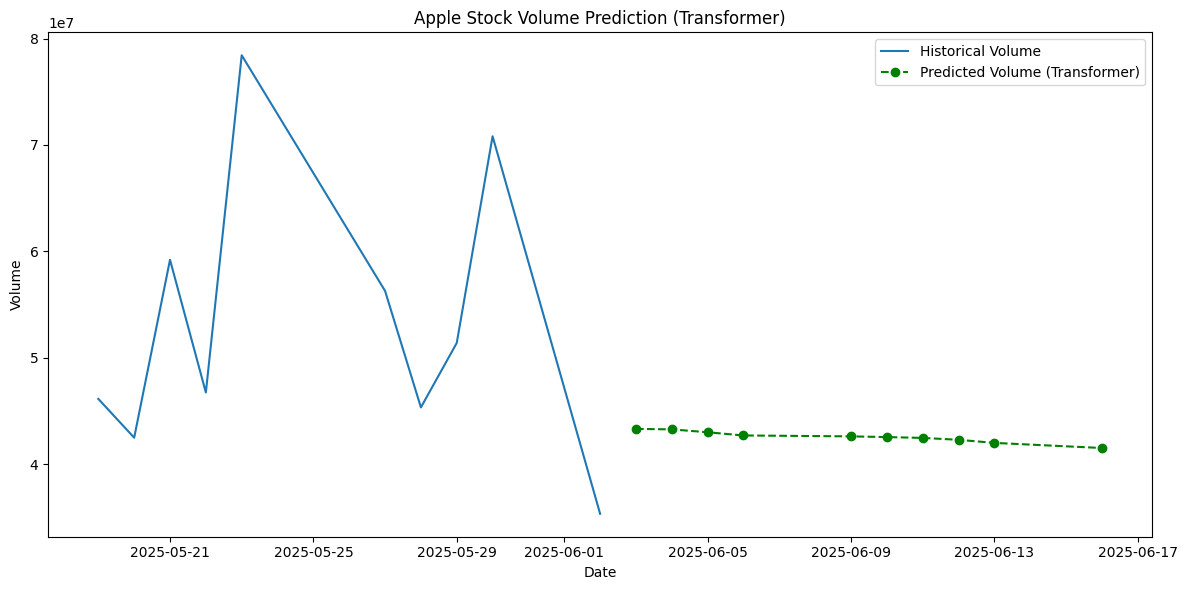

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-10:], data['Volume'][-10:], label='Historical Volume')
plt.plot(future_dates, predicted_volumes, marker='o', linestyle='--', color='green', label='Predicted Volume (Transformer)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Volume Prediction (Transformer)')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\otman\.conda\envs\appel_pred\lib\site-packages\xgboost\core.py:158: UserWarning: [14:24:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\otman\.conda\envs\appel_pred\lib\site-packages\xgboost\core.py:158: UserWarning: [14:24:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Next 10 days predicted Volume (XGBoost): [56581964. 62523392. 59045924. 51420476. 47008332. 58865260. 47797880.
 56621340. 53946800. 66757892.]


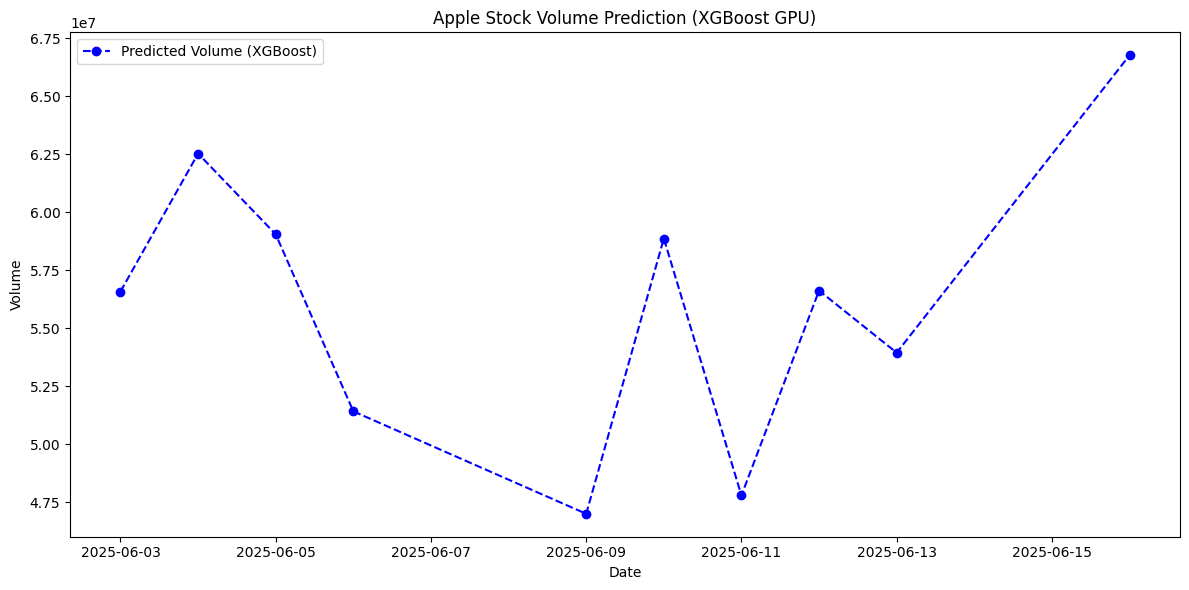

In [20]:
import xgboost as xgb

# Prepare data for XGBoost (flatten the sequences)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_flat, label=y_train, enable_categorical=False)
dtest = xgb.DMatrix(X_test_flat, label=y_test, enable_categorical=False)

# Set parameters for GPU training
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'eval_metric': 'rmse'
}

# Train the model
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict next 10 days using last_sequence and iterative prediction
current_seq_xgb = last_sequence.copy()
xgb_predictions = []
for _ in range(10):
    seq_flat = current_seq_xgb.reshape(1, -1)
    dseq = xgb.DMatrix(seq_flat)
    pred = xgb_model.predict(dseq)[0]
    xgb_predictions.append(pred)
    current_seq_xgb = np.append(current_seq_xgb[1:], [[pred]], axis=0)

# Inverse transform to get actual volume values
xgb_predicted_volumes = scaler.inverse_transform(np.array(xgb_predictions).reshape(-1, 1)).flatten()
print("Next 10 days predicted Volume (XGBoost):", xgb_predicted_volumes)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(future_dates, xgb_predicted_volumes, marker='o', linestyle='--', color='blue', label='Predicted Volume (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Volume Prediction (XGBoost GPU)')
plt.legend()
plt.tight_layout()
plt.show()

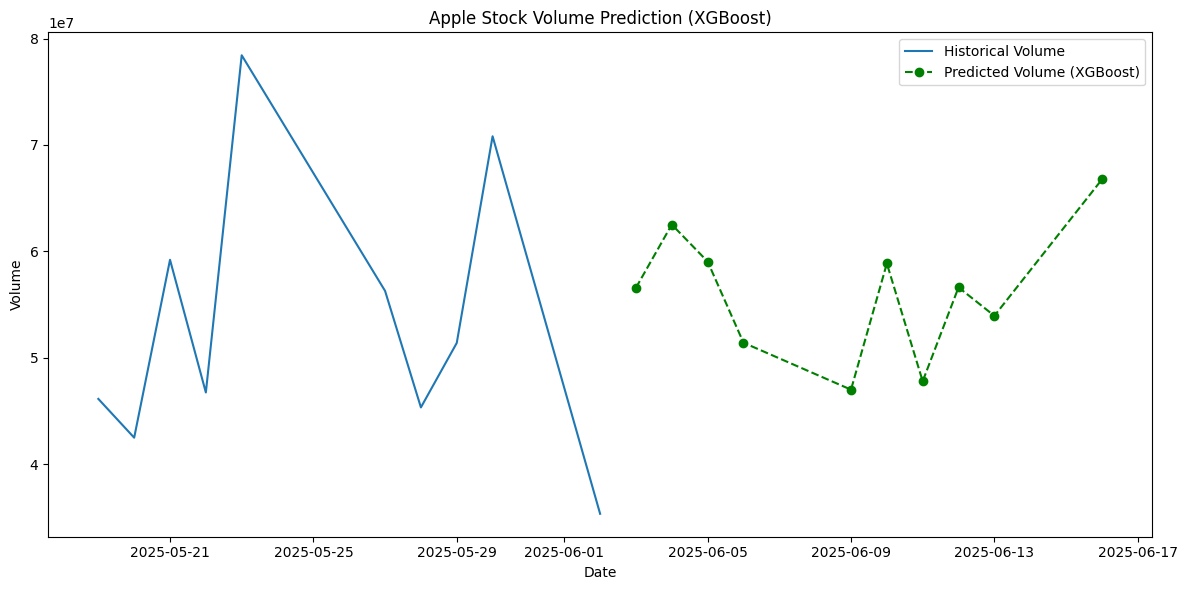

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-10:], data['Volume'][-10:], label='Historical Volume')
plt.plot(future_dates, xgb_predicted_volumes, marker='o', linestyle='--', color='green', label='Predicted Volume (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Volume Prediction (XGBoost)')
plt.legend()
plt.tight_layout()
plt.show()